In [1]:
from astroquery.gaia import Gaia
from astroquery.esasky import ESASky
import numpy as np
from simbad_download import resolve_name
import pandas as pd
import pyvo as vo
import gaia_download as gd
from cross_match import add_panstarrs1, add_twomass
import matplotlib.pyplot as plt
from extinction import add_color, mag_abs

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


1. arcesonds

In [2]:
sources = pd.read_csv('./clustered_pyupmask.csv')

In [3]:
sources

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_i,A_z,A_y,A_J,A_H,A_K,color,color_error,mag_abs,mag_abs_error
0,28257,1636148068921376768,Gaia DR3 573351475155035008,573351475155035008,236544348,2016.0,13.267578,0.474411,84.456973,0.483350,...,0.916515,0.720285,0.587295,0.368605,0.218085,0.140709,1.603039,0.170145,8.676971,2.127860
1,28274,1636148068921376768,Gaia DR3 573352398572667392,573352398572667392,1496645516,2016.0,12.993639,0.105877,84.541275,0.101403,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.313450,0.029984,6.871222,0.464217
2,28314,1636148068921376768,Gaia DR3 573354670612121088,573354670612121088,1494711348,2016.0,12.852203,0.035797,84.583456,0.034287,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,0.828158,0.006719,5.087451,0.154759
3,28351,1636148068921376768,Gaia DR3 573356251160187648,573356251160187648,1580589992,2016.0,14.600912,0.043472,84.598119,0.042857,...,0.855414,0.672266,0.548142,0.344032,0.203546,0.131328,0.925355,0.008670,5.193372,0.196794
4,28407,1636148068921376768,Gaia DR3 573358072225488640,573358072225488640,1042182307,2016.0,15.209703,0.548097,84.651333,0.534833,...,1.038717,0.816323,0.665601,0.417753,0.247163,0.159470,1.646164,0.219736,8.520184,2.735473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,46811,1636148068921376768,Gaia DR3 574074438411227008,574074438411227008,1625845342,2016.0,12.816654,0.023106,85.832411,0.022673,...,1.160919,0.912361,0.743907,0.466900,0.276241,0.178231,0.810865,0.002632,3.522337,0.120212
1354,46870,1636148068921376768,Gaia DR3 574077148534800256,574077148534800256,693263320,2016.0,15.660463,0.065472,85.827157,0.066398,...,0.794313,0.624247,0.508989,0.319458,0.189007,0.121948,1.058915,0.022668,5.933452,0.335183
1355,46886,1636148068921376768,Gaia DR3 574077492132196736,574077492132196736,406142901,2016.0,15.041704,0.306579,85.866458,0.294523,...,0.794313,0.624247,0.508989,0.319458,0.189007,0.121948,1.427450,0.100781,8.432726,1.258062
1356,47085,1636148068921376768,Gaia DR3 574086670477932160,574086670477932160,1450102305,2016.0,11.476798,0.234107,85.885935,0.246116,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.595926,0.083275,8.028013,1.050452


In [5]:
sources_with_panstarrs = add_panstarrs1(sources)

INFO: Query finished. [astroquery.utils.tap.core]
panstarrs1 cross-match: 1275 sources


In [7]:
sources_with_panstarrs = add_color(sources_with_panstarrs, 'g', 'z')
sources_with_panstarrs = mag_abs(sources_with_panstarrs, 'g')

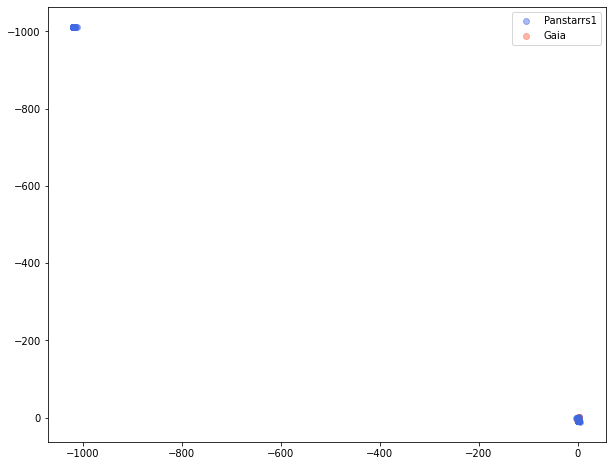

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(sources_with_panstarrs['g-z'], sources_with_panstarrs.g_abs,
            color='royalblue', label='Panstarrs1', alpha=.45, zorder=2)
plt.scatter(sources_with_panstarrs.color, sources_with_panstarrs.mag_abs,
            color='tomato', label='Gaia', alpha=.45)
plt.gca().invert_yaxis();
plt.legend();

In [9]:
sources_all = add_twomass(sources_with_panstarrs)

INFO: Query finished. [astroquery.utils.tap.core]
tmass_psc_xsc cross-match: 1164 sources
INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [28]:
twomass_photo = pd.merge(left=twomass, right=twomass_photo, left_on='twomass_id', right_on='name')

In [29]:
sources_all = pd.merge(left=sources_all, right=twomass_photo, on='source_id')

In [30]:
sources_all.head()

,g,g_error,r,r_error,i,i_error,z,z_error,yMeanPSFMag,yMeanPSFMagErr,...,g_abs_error,twomass_id_x,twomass_id_y,name,H,H_error,J,J_error,K,K_error
0,19.279100,0.006316,18.455999,0.011471,18.062300,0.013024,17.885300,0.009377,17.7981,0.019061,...,0.464257,00515823+8432287,00515823+8432287,00515823+8432287,16.186001,0.237,16.705,0.143,15.810,0.267
1,17.080999,0.004002,16.580400,0.003973,16.385201,0.005735,16.302000,0.004044,16.2663,0.003354,...,0.154809,00512445+8435004,00512445+8435004,00512445+8435004,14.937000,0.092,15.341,0.056,14.821,0.112
2,17.479900,0.008991,16.860300,0.004544,16.615900,0.005293,16.508200,0.004291,16.4240,0.009001,...,0.196998,00582412+8435530,00582412+8435530,00582412+8435530,15.102000,0.082,15.472,0.039,15.052,0.123
3,17.290001,0.005483,16.724600,0.003584,16.483999,0.002375,16.383499,0.006939,16.3304,0.011896,...,0.213743,00570724+8446523,00570724+8446523,00570724+8446523,14.896000,0.082,15.399,0.046,14.780,0.096
4,13.189800,0.000926,12.673000,-999.000000,12.220000,-999.000000,11.932000,-999.000000,11.7880,-999.000000,...,0.046451,00522777+8444434,00522777+8444434,00522777+8444434,10.072000,0.033,10.632,0.028,9.912,0.020


In [31]:
twomass_photo = add_color(sources_all, 'H', 'K')

In [32]:
twomass_photo = mag_abs(sources_all, 'H')

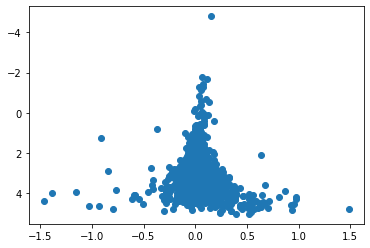

In [35]:
plt.scatter(twomass_photo['H-K'], twomass_photo['H_abs'])
plt.gca().invert_yaxis();